In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
df = pd.read_csv('Data/wish_sales_data_cleaned.csv')

In [87]:
df.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'num_listings', 'tag_list',
       'image_contains_person'],
      dtype='object')

In [88]:
#Simplify sizes to smaller subset
def size_simplifier(size):
    if size == 'Small' or size == 'S' or size == 'S.' or size == 'Size S' or size == 'Size-S' or size == 's' or size == 'S Pink' or size == 'size S' or size == 'Size S.' or size == 'Suit-S':
        return 'Small'
    elif size == 'XSmall' or size == 'XS' or size == 'XS.' or size == 'SIZE XS' or size == 'Size-XS':
        return 'XSmall'
    elif size == 'XXSmall' or size == 'XXS' or size == 'SIZE-XXS' or size == 'Size-XXS' or size == 'Size XXS':
        return 'XXSmall'
    elif size == 'Medium' or size == 'M' or size == 'M.' or size == 'Size M':
        return 'Medium'
    elif size == 'Large' or size =='L' or size == 'SizeL':
        return 'Large'
    elif size == 'XLarge' or size == 'XL':
        return 'XLarge'
    elif size == 'XXLarge' or size == 'XXL' or size == '2XL':
        return 'XXLarge'
    else:
        return 'na_size'
    
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: size_simplifier(x))

In [89]:
#Simplify colors to smaller subset
def color_simplifier(color):
    if 'multicolor' in color.lower() or 'two_color' in color.lower() or '&' in color.lower():
        return 'multicolor'
    elif 'black' in color.lower():
        return 'black'
    elif 'white' in color.lower():
        return 'white'
    elif 'yellow' in color.lower():
        return 'yellow'
    elif 'pink' in color.lower():
        return 'pink'
    elif 'blue' in color.lower():
        return 'blue'
    elif 'red' in color.lower():
        return 'red'
    elif 'green' in color.lower():
        return 'green'
    elif 'grey' in color.lower() or 'gray' in color.lower():
        return 'grey'
    elif 'purple' in color.lower():
        return 'purple'
    elif 'brown' in color.lower() or 'coffee' in color.lower() or 'khaki' in color.lower() or 'beige' in color.lower():
        return 'brown'
    elif 'orange' in color.lower():
        return 'orange'
    else:
        return 'na_color'
    
df['product_color'] = df['product_color'].apply(lambda x: color_simplifier(x))

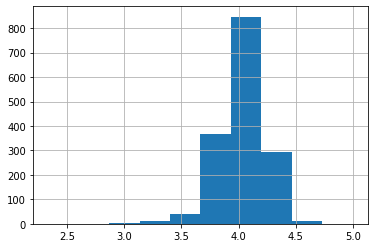

In [90]:
df.merchant_rating.hist()

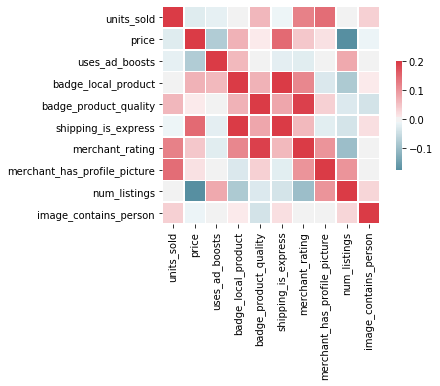

In [91]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['units_sold','price','uses_ad_boosts','badge_local_product', 'badge_product_quality', 
                'shipping_is_express', 'merchant_rating',
       'merchant_has_profile_picture', 'num_listings',
                'image_contains_person']].corr(),vmax = 0.2, center=0, cmap=cmap,square=True,
            linewidths=0.5, cbar_kws={"shrink": .5})

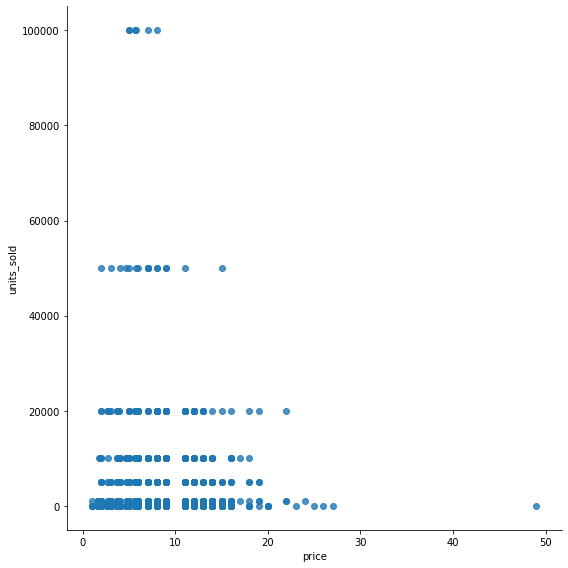

In [92]:
sns.lmplot('price','units_sold',data=df,fit_reg = False,height =8)

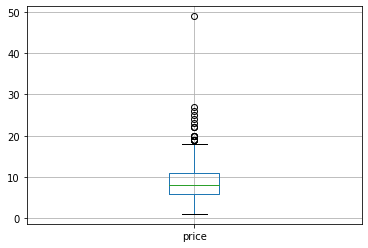

In [93]:
df.boxplot(column = ['price'])

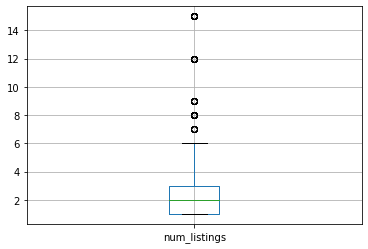

In [94]:
df.boxplot(column = ['num_listings'])

In [95]:
df['image_contains_person']

0       1
1       1
2       0
3       0
4       1
       ..
1568    1
1569    1
1570    1
1571    1
1572    1
Name: image_contains_person, Length: 1573, dtype: int64

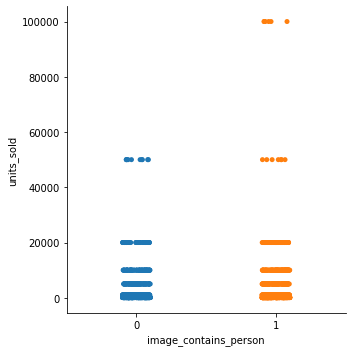

In [96]:
sns.catplot(x="image_contains_person", y="units_sold", data=df)

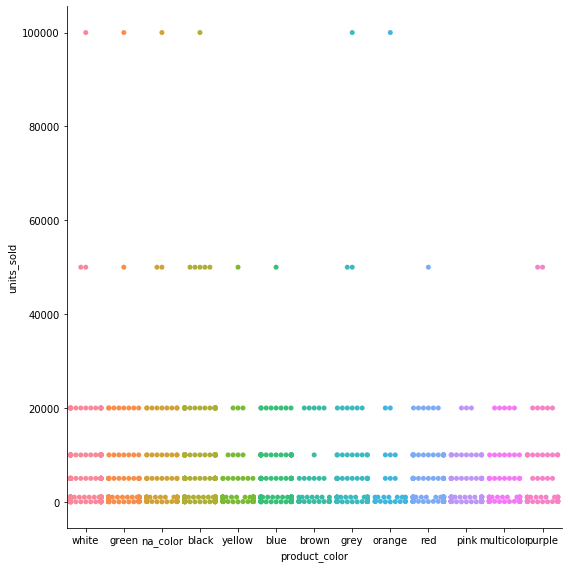

In [97]:
sns.catplot(x="product_color", y="units_sold",kind='swarm', data=df,height=8)

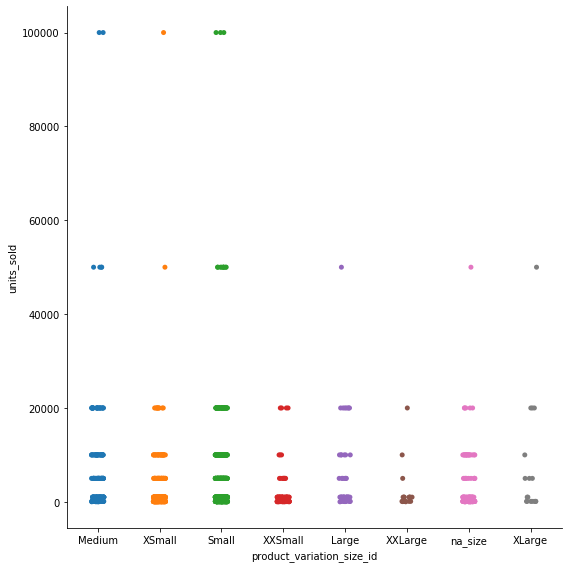

In [98]:
sns.catplot(x="product_variation_size_id", y="units_sold", data=df,height=8)

In [99]:
df.columns

Index(['title_orig', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'num_listings', 'tag_list',
       'image_contains_person'],
      dtype='object')

Text(0, 0.5, 'Density')

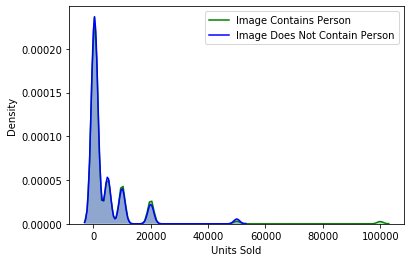

In [100]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["image_contains_person"]==1]["units_sold"], shade=True, color="green", label="Image Contains Person", ax=ax)
sns.kdeplot(df[df["image_contains_person"]==0]["units_sold"], shade=True, color="blue", label="Image Does Not Contain Person", ax=ax)

ax.set_xlabel("Units Sold")
ax.set_ylabel("Density")

In [101]:
df_cat = df[['product_color','product_variation_size_id']]

Graph for product_color: Total = 13


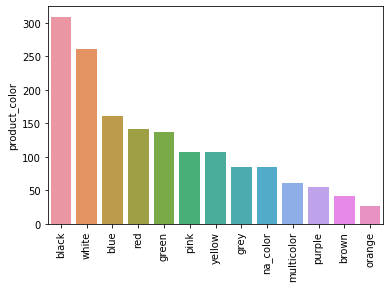

Graph for product_variation_size_id: Total = 8


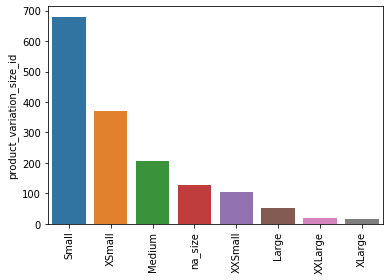

In [102]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: Total = %d' % (i,len(cat_num)))
    chart = sns.barplot(cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

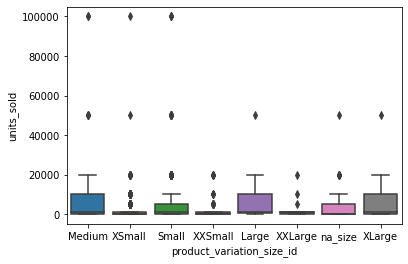

In [103]:
ax = sns.boxplot(x="product_variation_size_id", y="units_sold", data=df)

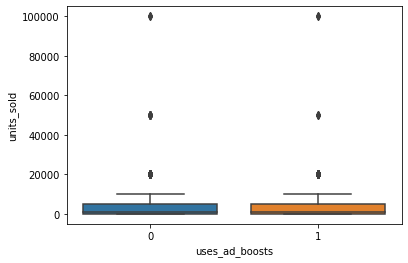

In [105]:
ax = sns.boxplot(x="uses_ad_boosts", y="units_sold", data=df)

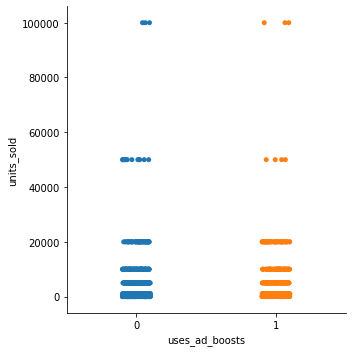

In [107]:
sns.catplot(x="uses_ad_boosts", y="units_sold", data=df)

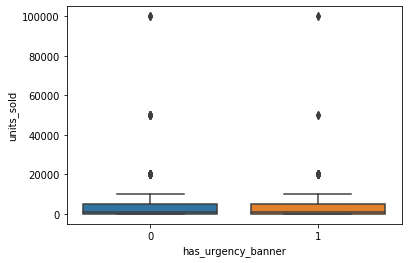

In [111]:
ax = sns.boxplot(x="has_urgency_banner", y="units_sold", data=df)

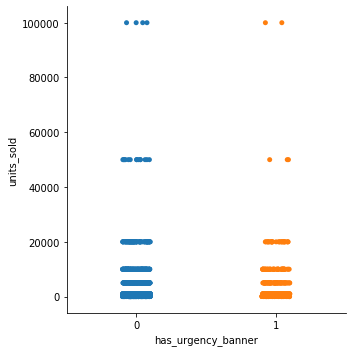

In [109]:
sns.catplot(x="has_urgency_banner", y="units_sold", data=df)

In [113]:
df_out = df
df_out.to_csv('Data/data_eda.csv',index = False

SyntaxError: unexpected EOF while parsing (<ipython-input-113-8b6845a4320b>, line 2)